**INTRODUÇÃO**

>O objetivo é analisar como as músicas dos **Rolling Stones** impactam os usuários do **Spotify**, identificando padrões de consumo e preferências para aprimorar recomendações e estratégias da plataforma.

 **ANÁLISE EXPLORATÓRIA**

In [21]:
# Importando Pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Carregando o arquivo
df = pd.read_excel('dataset_rolling_stones.xlsx')

In [6]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [7]:
#Exibindo os tipos de dados das colunas
print(df.dtypes)

name                        object
album                       object
release_date        datetime64[ns]
track_number                 int64
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object


In [10]:
#Quantidades de linhas e colunas do dataset
df.shape

(1610, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [12]:
#Inicio e o fim do ano de lançamento dos álbuns
print("Data Inicial: ", df['release_date'].min())
print("Data Final: ", df['release_date'].max())

Data Inicial:  1964-04-16 00:00:00
Data Final:  2022-06-10 00:00:00


In [14]:
# Contando valores nulos em cada coluna
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [15]:
# Contando registros duplicados
df.duplicated().sum()

np.int64(6)

In [16]:
# Exibindo registros duplicados
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


Os duplicados correspondem aos álbuns, mas as músicas são diferentes.

In [18]:
#Análise descritiva: média, valor mínimo e máximo, desvio padrão e quartis
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


In [19]:
#Criando uma coluna duration_ms em minutos
df['duracao_em_min'] = df['duration_ms'] / 60000
df.head(5)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [20]:
#Agrupando os álbuns para calcular a média do tempo
df.groupby('album')['duracao_em_min'].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duracao_em_min, Length: 90, dtype: float64

**ANÁLISE GRÁFICA**

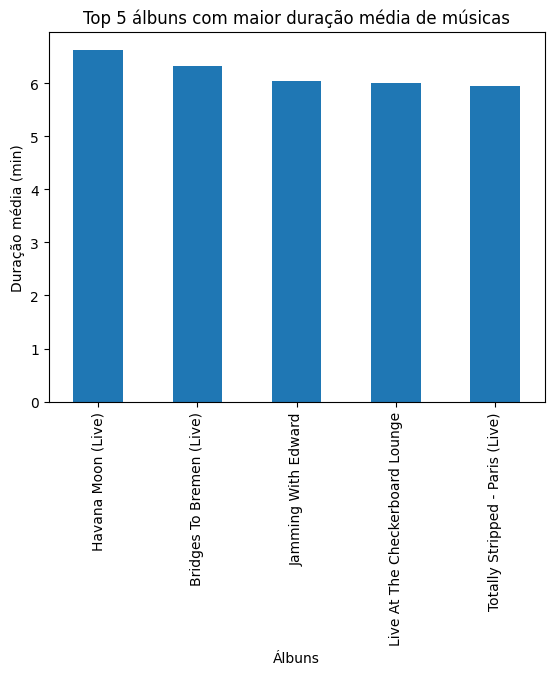

album
Havana Moon (Live)                 6.632819
Bridges To Bremen (Live)           6.332265
Jamming With Edward                6.042794
Live At The Checkerboard Lounge    6.009647
Totally Stripped - Paris (Live)    5.947430
Name: duracao_em_min, dtype: float64

In [24]:
# Ordenando os álbuns pela média de tempo das músicas, do maior para o menor
df_maior_duracao_musica = df.groupby('album')['duracao_em_min'].mean().sort_values(ascending=False)

#Top 5
df_maior_duracao_musica.head(5).plot(kind='bar') #Escolhendo o Tipo de gráfico
plt.xlabel('Álbuns') #Título - eixo horizontal
plt.ylabel('Duração média (min)')#Título - eixo vertical
plt.title('Top 5 álbuns com maior duração média de músicas') #Título do gráfico
plt.show() #Mostrando o gráfico

display(df_maior_duracao_musica.head(5))

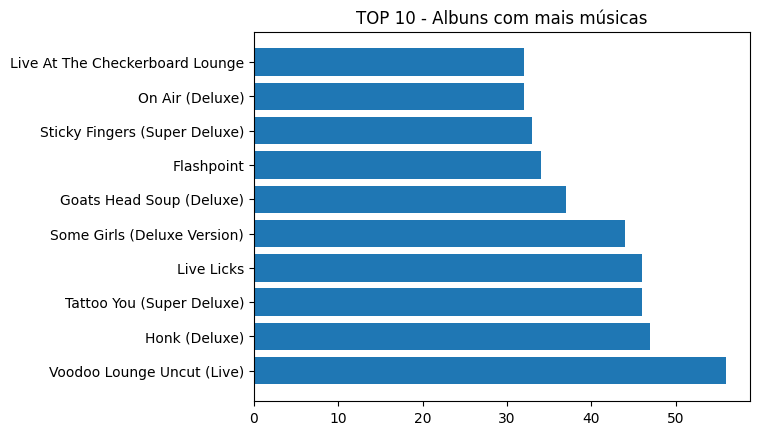

In [27]:
#Top 10
top_albums = df['album'].value_counts().head(10)
#Separando os nossos valores no eixo X e Y
plt.barh(top_albums.index, top_albums.values)
plt.title("TOP 10 - Albuns com mais músicas")
plt.show()

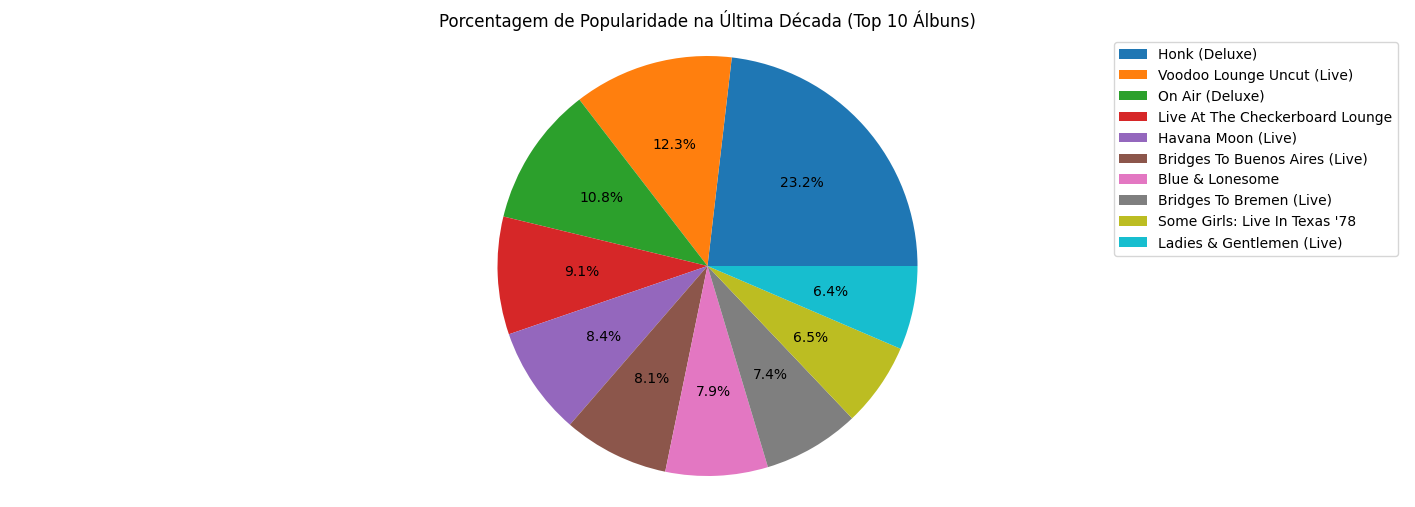

In [ ]:
#Top 10 álbuns populares da última década
#Filtrando dados da última década
df_ultima_decada = df[df['release_date'].between(pd.to_datetime('2011'), pd.to_datetime('2020'))]

#Agrupando os dados por álbum e somar a coluna "popularity"
df_por_album = df_ultima_decada.groupby('album')['popularity'].sum().sort_values(ascending=False).head(10)

#CCalculando a porcentagem de popularidade para cada álbum
total_popularidade = df_por_album.sum()
df_porcentagem = df_por_album / total_popularidade * 100

#Separando os valores e nomes em uma lista
labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

#Gráfico de pizza
figura, grafico = plt.subplots(figsize=(18, 6))
grafico.pie(sizes, autopct='%1.1f%%') #Formatando valores em porcentagem com 2 casas decimais
grafico.axis('equal') #Ajusta a escala dos eixos par
a serem proporcionais
plt.title('Porcentagem de Popularidade na Última Década (Top 10 Álbuns)')
plt.legend(labels, loc='best') #Legenda
plt.show()